# Exercise 1 - np.fromFunctionname
Change the function to name to my_function_firstname, where firstname is your first name.

Let the function return an integer value stored in one byte i.e. ‘int8’ of (2x)*(3y). Where x is the number of rows and y is the number of columns.

 Use np.fromfunction() to generate  three elements each are two by six using the  new my_fuction_firstname.

In [ ]:
def my_function_renzo(z, x, y):
  return 2 * x * 3 * y

answer = np.fromfunction(my_function_renzo, (3, 2, 6), dtype="int8")
print("Data type of values in numpy array\n", answer.dtype)
print("Answer and Data type\n", answer, answer.dtype)
print("test", answer.data)

Data type of values in numpy array
 int8
Answer and Data type
 [[[ 0  0  0  0  0  0]
  [ 0  6 12 18 24 30]]

 [[ 0  0  0  0  0  0]
  [ 0  6 12 18 24 30]]

 [[ 0  0  0  0  0  0]
  [ 0  6 12 18 24 30]]] int8
test <memory at 0x7fef2d1b2450>


# Exercise 2 - Data buffer

Change the name of the array from ‘f’ to your firstname and the type from 4 bytes to 2 bytes and rerun both cells and notice the difference.

In [ ]:
renzo = np.array([[1,2],[1000, 2000]], dtype=np.int16)
print(renzo)
print('\n')
renzo.data.tobytes()

# We can see that the np array is stored in the memory using 8 blocks of 2 bits each one, 
# thus 2x8 = 16 bits. If we change to 32, then the memory expands to 16 slots of 2 bits each one

[[   1    2]
 [1000 2000]]




b'\x01\x00\x02\x00\xe8\x03\xd0\x07'

## `data` buffer
An array's data is actually stored in memory as a flat (one dimensional) byte buffer. It is available *via* the `data` attribute (you will rarely need it, though).

In [ ]:
f = np.array([[1,2],[1000, 2000]], dtype=np.int32)
f.data

In python 2, `f.data` is a buffer. In python 3, it is a memoryview.

In [ ]:
if (hasattr(f.data, "tobytes")):
    data_bytes = f.data.tobytes() # python 3
else:
    data_bytes = memoryview(f.data).tobytes() # python 2

data_bytes

b'\x01\x00\x00\x00\x02\x00\x00\x00\xe8\x03\x00\x00\xd0\x07\x00\x00'

Several `ndarrays` can share the same data buffer, meaning that modifying one will also modify the others. We will see an example in a minute.

# Exercise 3 - Re-shape
	
Add a cell at the end of the section to reshape g into a 2 by 12 ndaray and save it to a variable named g_firstname where firstname is your firstname.

In [ ]:
g = np.arange(24)
print(g)
print("Rank:", g.ndim)
print("\n")

g_renzo = g.reshape(2,12)
print(g_renzo)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Rank: 1


[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]]


# Exercise 4 - Upcasting
	
Change the type of k1 to int32

In [ ]:
k1 = np.arange(0, 5, dtype=np.int32)
print(k1.dtype, k1)


int32 [0 1 2 3 4]


# Exercise 5 - Conditional Operators
	
Change the value of comparison from 25 to 35.

In [ ]:
m = np.array([20, -5, 30, 40])
m < 35

array([ True,  True,  True, False])

# Exercise 6 - ndarray methods

Add a cell showing the result of summing over axis 2 for array c and notice the difference.

In [ ]:
c=np.arange(24).reshape(2,3,4)
c.sum(axis=2)

# It is shown that the sum is done accross columns of each matrix

array([[ 6, 22, 38],
       [54, 70, 86]])

## Universal functions
NumPy also provides fast elementwise functions called *universal functions*, or **ufunc**. They are vectorized wrappers of simple functions. For example `square` returns a new `ndarray` which is a copy of the original `ndarray` except that each element is squared:

In [ ]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
np.square(a)

array([[  6.25,   9.61,  49.  ],
       [100.  , 121.  , 144.  ]])

Here are a few more useful unary ufuncs:

In [ ]:
print("Original ndarray")
print(a)
for func in (np.abs, np.sqrt, np.exp, np.log, np.sign, np.ceil, np.modf, np.isnan, np.cos):
    print("\n", func.__name__)
    print(func(a))

Original ndarray
[[-2.5  3.1  7. ]
 [10.  11.  12. ]]

 absolute
[[ 2.5  3.1  7. ]
 [10.  11.  12. ]]

 sqrt
[[       nan 1.76068169 2.64575131]
 [3.16227766 3.31662479 3.46410162]]

 exp
[[8.20849986e-02 2.21979513e+01 1.09663316e+03]
 [2.20264658e+04 5.98741417e+04 1.62754791e+05]]

 log
[[       nan 1.13140211 1.94591015]
 [2.30258509 2.39789527 2.48490665]]

 sign
[[-1.  1.  1.]
 [ 1.  1.  1.]]

 ceil
[[-2.  4.  7.]
 [10. 11. 12.]]

 modf
(array([[-0.5,  0.1,  0. ],
       [ 0. ,  0. ,  0. ]]), array([[-2.,  3.,  7.],
       [10., 11., 12.]]))

 isnan
[[False False False]
 [False False False]]

 cos
[[-0.80114362 -0.99913515  0.75390225]
 [-0.83907153  0.0044257   0.84385396]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


## Binary ufuncs
There are also many binary ufuncs, that apply elementwise on two `ndarray`s.  Broadcasting rules are applied if the arrays do not have the same shape:

In [ ]:
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
np.add(a, b)  # equivalent to a + b

array([ 3,  6,  2, 11])

In [ ]:
np.greater(a, b)  # equivalent to a > b

array([False, False,  True, False])

In [ ]:
np.maximum(a, b)

array([2, 8, 3, 7])

In [ ]:
np.copysign(a, b)

array([ 1.,  2., -3.,  4.])

# Exercise 7 - Binary ufuncs

Add a cell to show the result of copysign of (b,a)

In [ ]:
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])

np.copysign(b,a)

array([ 2., -8.,  1.,  7.])

# Exercise 8 - Differences with regular python arrays

Add a cell after amending the third element of a_slice to the value 2000 to print the final result of a

In [ ]:
a = np.array([1, 5, 3, 19, 13, 7, 3])
a_slice = a[2:6]
a_slice[3] = 2000
print("Final result of a array", a)


Final result of a array [   1    5    3   19   13 2000    3]


# Exercise 9 - Multi-dimensional arrays

Add a cell to extract values 16,17,18

In [ ]:
b = np.arange(48).reshape(4, 12)
b
b[1,4:7] #Extract values of first row, columns 4th to 7th

array([16, 17, 18])

# Exercise 10 - Boolean Indexing

Using Boolean indexing, add a cell to extract the first and last columns of array b.(name the boolean array  cols_on2_firstname where first name is your firstname)

In [ ]:
b = np.arange(48).reshape(4, 12)
b
print("b", b)


cols_on2_renzo = np.array([False for i in range(b.shape[1])]);
cols_on2_renzo[0] = True;
cols_on2_renzo[-1] = True;
print("cols_on2_renzo => ", cols_on2_renzo)

print("answer => ", b[:, cols_on2_renzo] )


b [[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44 45 46 47]]
cols_on2_renzo =>  [ True False False False False False False False False False False  True]
answer =>  [[ 0 11]
 [12 23]
 [24 35]
 [36 47]]


# Exercise 11 - Iterating

Add a cell to iterate over c and print the Boolean values for items equivalent to zeros.

In [ ]:
c = np.arange(24).reshape(2, 3, 4)  # A 3D array (composed of two 3x4 matrices)

for i in c.flat:
    print("c[", i, "] = ", i, "=>", bool(i))

c[ 0 ] =  0 => False
c[ 1 ] =  1 => True
c[ 2 ] =  2 => True
c[ 3 ] =  3 => True
c[ 4 ] =  4 => True
c[ 5 ] =  5 => True
c[ 6 ] =  6 => True
c[ 7 ] =  7 => True
c[ 8 ] =  8 => True
c[ 9 ] =  9 => True
c[ 10 ] =  10 => True
c[ 11 ] =  11 => True
c[ 12 ] =  12 => True
c[ 13 ] =  13 => True
c[ 14 ] =  14 => True
c[ 15 ] =  15 => True
c[ 16 ] =  16 => True
c[ 17 ] =  17 => True
c[ 18 ] =  18 => True
c[ 19 ] =  19 => True
c[ 20 ] =  20 => True
c[ 21 ] =  21 => True
c[ 22 ] =  22 => True
c[ 23 ] =  23 => True


# Exercise 12 - vstack

Add a cell to create a variable name it q5_firstname where firstname is your firstname and vertically stack q1 and q2 and print the output.

In [ ]:
q1 = np.full((3,4), 1.0)
q2 = np.full((4,4), 2.0)

q5_renzo = np.vstack((q1,q2))
print("q5_renzo\n", q5_renzo)

q5_renzo
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]


# Exercise 13 - concatenate

Add a cell to create a variable name it q8_firstname where firstname is your firstname , concatenate q1 and q3 and print the results.

In [ ]:
q3 = np.full((3,4), 3.0)


q8_renzo = np.concatenate((q1,q3), axis=0)
print("Vertical concatenation (axis=0)\n", q8_renzo)
print("\n")
q8_renzo = np.concatenate((q1,q3), axis=1)
print("Horizontal concatenation (axis=1)\n", q8_renzo)


Vertical concatenation (axis=0)
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]]


Horizontal concatenation (axis=1)
 [[1. 1. 1. 1. 3. 3. 3. 3.]
 [1. 1. 1. 1. 3. 3. 3. 3.]
 [1. 1. 1. 1. 3. 3. 3. 3.]]


# Exercise 14 - Transpose

Add a cell and create a variable named t_firstname where firstname is your name, let the variable hold any ndaray size 2 by 7 with zero values, print the result then transpose and print the result.

In [ ]:
import numpy as np
t = np.zeros((2,7))
# t_renzo = 
print("Original array\n", t)
print("\n")
t_t = t.transpose(1,0)
print("Transposed array", t_t)


Original array
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


Transposed array [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


# Exercise 15 - Matrix Multiplication

Add a cell to create 2 ndarys name the first a1 and the second a2. Both arrays should contain numbers in the range 0 to 7. Print a1 and a2. Create a new variable a3 which holds the product multiplication of a1 and a2 name it a3 and print the output of a3, then the shape of a3.

In [ ]:
a1 = np.vstack((np.arange(7), np.arange(7)))
print("a1 => ", a1.shape)

a2 = np.arange(7).reshape(7,1);
print("a2 => ", a2)

a3 = a1.dot(a2);
print("a3 => ", a3)





a1 =>  (2, 7)
a2 =>  [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]]
a3 =>  [[91]
 [91]]


# Exercise 16 - Matrix inverse and pseudo-inverse
Add a cell to create a new 4 by 4 ndaray with values between0 and 15, name the variable that holds the array your first name, print the array and the inverse of the array.

In [ ]:
r1 = np.random.randint(15, size=(4,4))
print("r1 => ", r1)

import numpy.linalg as linalg 

print("\n")
inv = linalg.inv(r1)
print("inv => ", inv)
print("\n")
pinv = linalg.pinv(r1)
print("pinv => ", pinv)


r1 =>  [[ 9  8 11  9]
 [ 4 11  7 11]
 [ 7 14 10 13]
 [ 4  7 10  8]]


inv =>  [[ 0.22461538  0.00307692 -0.01230769 -0.23692308]
 [-0.31384615 -0.68923077  0.75692308  0.07076923]
 [-0.11384615 -0.28923077  0.15692308  0.27076923]
 [ 0.30461538  0.96307692 -0.85230769 -0.15692308]]


pinv =>  [[ 0.22461538  0.00307692 -0.01230769 -0.23692308]
 [-0.31384615 -0.68923077  0.75692308  0.07076923]
 [-0.11384615 -0.28923077  0.15692308  0.27076923]
 [ 0.30461538  0.96307692 -0.85230769 -0.15692308]]


# Exercise 16 - Identity Matrix

Add a cell to create a 5 by 5 identity array.

In [ ]:
ex16 = np.random.randint(24, size=(5,5))
ex16
ex16_identity = ex16.dot(np.linalg.inv(ex16))
ex16_identity
# or
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])


# Exercise 17 - Determinant

Add a cell to create a 3 by 3 matrix with values generated randomly then printout the determinant of the matrix.

In [ ]:
ex17 = np.random.randint(10, size=(3,3))
print("ex17 => ", ex17)

det = linalg.det(ex17)
print("det => ", det)

ex17 =>  [[3 2 1]
 [4 4 6]
 [3 8 8]]
det =>  -55.99999999999997


# Exercise 18 - Eigenvalues and eigenvectors

Add a cell to create a 4 by 4 matrix with values generated randomly, assign the matrix to a variable named e_firstname. Printout the Eigenvalue and eigenvectors of the matrix.

In [ ]:
e_renzo = np.random.randint(100, size=(4,4))
print("e_renzo", e_renzo)

eigenvalues, eigenvectors = linalg.eig(e_renzo)
print("eigenvalues => ", eigenvalues)

print("eigenvectors => ", eigenvectors)

e_renzo [[29  9 57 12]
 [62 22 69 41]
 [55 48 87 62]
 [51 35 31 16]]
eigenvalues =>  [179.27931453 +0.j          -4.79542585+25.83788597j
  -4.79542585-25.83788597j -15.68846284 +0.j        ]
eigenvectors =>  [[ 0.32599218+0.j          0.22516733-0.52491593j  0.22516733+0.52491593j
   0.17122061+0.j        ]
 [ 0.52765312+0.j         -0.19648993-0.06598443j -0.19648993+0.06598443j
  -0.70806661+0.j        ]
 [ 0.70281792+0.j          0.26538562+0.42370991j  0.26538562-0.42370991j
  -0.1625458 +0.j        ]
 [ 0.34836511+0.j         -0.61712324+0.j         -0.61712324-0.j
   0.66551036+0.j        ]]


# Exercise 19 - Solving a systems of linear scalar equations

	
Add a cell to solve the following linear equations:

2x+4y+z =8

3x+8y+2z =16

X+2y+3z = -2

Check the results using the allcolse method.

In [ ]:
coeffs = np.array([[2, 4, 1],[3, 8, 2], [1,  2, 3]]);
depvars = np.array([8, 16, -2])

solution = linalg.solve(coeffs, depvars)
print("solution => ",  solution)

# Checking solution

coeffs.dot(solution), depvars
# another way
np.allclose(coeffs.dot(solution), depvars)

solution =>  [ 0.   2.6 -2.4]


True

Exercise 20 - Vectorization

Add cells to replicate the example but instead of sin use cos. Name the data data1 and produce a graph.

In [ ]:
x_coords = np.arange(0, 1024);
y_coords = np.arange(0, 768);

X, Y = np.meshgrid(x_coords, y_coords);
X

array([[   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       ...,
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023]])

In [ ]:
Y

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [765, 765, 765, ..., 765, 765, 765],
       [766, 766, 766, ..., 766, 766, 766],
       [767, 767, 767, ..., 767, 767, 767]])

In [ ]:
print("X shape =>", X.shape)
print("Y shape =>", Y.shape)

X shape => (768, 1024)
Y shape => (768, 1024)


In [ ]:
data1 = np.cos(X*Y/40.5)
data1.shape

(768, 1024)

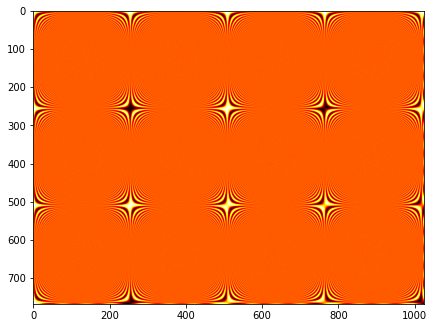

In [ ]:
# Create the graph
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig = plt.figure(1, figsize=(7,6))
plt.imshow(data1, cmap=cm.hot, interpolation="bicubic") #cmpa: colormap
plt.show()

# Exercise 20 - Text Format
Add cells to create a 4 by 4 matrix with values generated randomly, assign the matrix to a variable named sav_firstname. Save the matrix to an csv file named your firstname_sav. Load the csv file into a new variable called load_firstname.

In [ ]:
sav_renzo = np.random.rand(4,4)
sav_renzo
np.savetxt("my_array.csv", sav_renzo)

In [ ]:
with open("my_array.csv", "rt") as f: #r for read, and t for text
  print("content => ", f.read())


content =>  8.043313552121834631e-01 6.320077303985666139e-01 4.339644129611555101e-01 8.294037231323145853e-01
5.175128012439045300e-02 8.079429289250544821e-01 4.442183419993598337e-01 8.637180234239890675e-01
4.124547672819564026e-01 1.033167022580023797e-01 2.312770112620067264e-01 5.056673467047654302e-01
1.283926869286479144e-01 6.604309807284923783e-01 7.050854007451877736e-01 8.187126077532806967e-01



In [ ]:
# customize delimiter
np.savetxt("my_array.csv", sav_renzo, delimiter=",")

In [ ]:
load_renzo = np.loadtxt("my_array.csv", delimiter=",")
load_renzo

array([[0.80433136, 0.63200773, 0.43396441, 0.82940372],
       [0.05175128, 0.80794293, 0.44421834, 0.86371802],
       [0.41245477, 0.1033167 , 0.23127701, 0.50566735],
       [0.12839269, 0.66043098, 0.7050854 , 0.81871261]])